In [46]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb # Import the CAMB module

# CMB Parameter Sensitivity

The Standard Cosmological Model, i. e. the $\Lambda CDM$ model, is based on six foundamental parameters:
- $A_s$
- $n_s$
- $\tau$
- $H_0$: value of the Hubble constant at the present epoch;
- $\Omega_bh^2$
- $\Omega_ch^2$

In [47]:
# Set up a new set of parameters for CAMB using Planck 2018 cosmological parameters
pars = camb.set_params(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561,  
                       As=2.101e-9, ns=0.9665, halofit_version='mead', lmax=3000)

In [48]:
# Calculate results for these parameters
results = camb.get_results(pars)

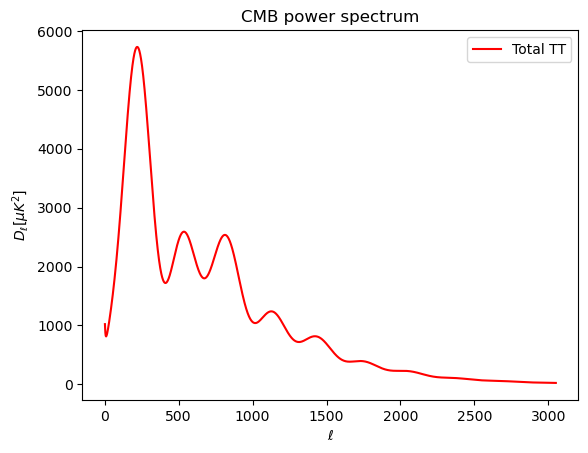

In [49]:
# Plot the CMB temperature power spectrum
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total'] # Get the total CMB power spectrum
ells = np.arange(totCL.shape[0])

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()


Note that TT stands for Temperature - Temperature: it describes how the temperature fluctuations in the CMB are distributed across different angular scales. Essentially, it quantifies the variation in temperature as a function of scale.

Recall that:
$$
D_l = \frac{l(l+1)C_l}{2\pi}
$$

# WARNING

In [50]:
# Monopole and dipole aren't 0 by default????
print('Monopole:', totCL[0,0])
print('Dipole:', totCL[1,0])

Monopole: 0.0
Dipole: 0.0


In [51]:
# Contribution from ISW effect
pars1 = camb.set_params(H0=67.66, ombh2=0.02242, omch2=0.11933, tau=0.0561,  
                       As=2.101e-9, ns=0.9665, halofit_version='mead', lmax=3000)

pars1.SourceTerms.counts_ISW = False

In [52]:
results1 = camb.get_results(pars1)
powers1 = results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
totCL1=powers1['total'] # Get the total CMB power spectrum

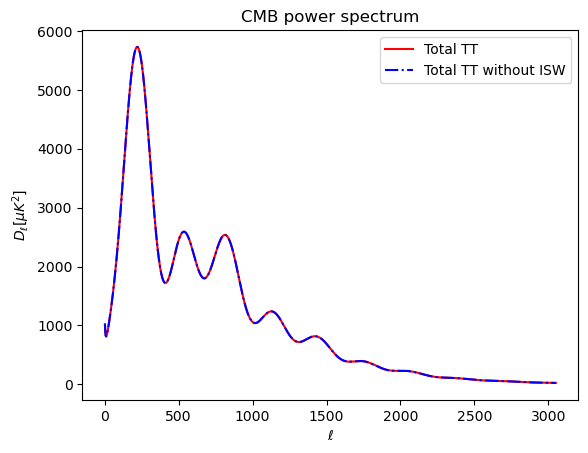

In [53]:
# Plot the CMB power spectrum VS the one without ISW effect
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') 
plt.plot(ells[2:],totCL1[2:,0], color='b',ls = '-.',label='Total TT without ISW')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()
